In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analysis of Pre-tests, Checkpoints and Post-tests Data

In [2]:
participants_data = pd.read_excel('thesis_data.xlsx', 
                                       sheet_name='participants')
participants_data

,ParticipantID,PreTest,Checkpoints,PostTests
0,100,2,7,9
1,101,6,13,15
2,102,1,13,12
3,104,6,11,15
4,105,4,15,16
5,106,4,16,16
6,107,4,16,16
7,109,5,9,10
8,115,6,11,14
9,116,5,14,15


In [3]:
participants_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ParticipantID,100,101,102,104,105,106,107,109,115,116,117,121,130,131,132,133,150,666,667
PreTest,2,6,1,6,4,4,4,5,6,5,5,6,6,3,4,3,5,6,3
Checkpoints,7,13,13,11,15,16,16,9,11,14,8,10,16,16,15,15,14,13,15
PostTests,9,15,12,15,16,16,16,10,14,15,12,12,16,15,15,15,15,14,14


Text(0.5, 0, 'Participants (by ID)')

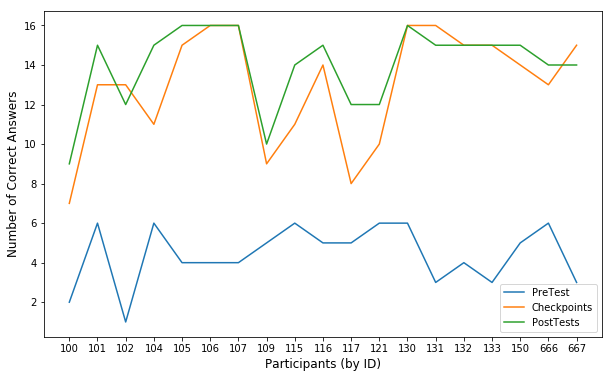

In [4]:
line_data = participants_data[['PreTest', 'Checkpoints', 'PostTests']]
line_data.plot.line(figsize=(10, 6))
plt.ylabel('Number of Correct Answers', fontsize=12)
plt.xticks(np.arange(0, 19), participants_data['ParticipantID'])
plt.xlabel('Participants (by ID)', fontsize=12)

([<matplotlib.axis.YTick at 0x126cb270>,
 <a list of 17 Text yticklabel objects>)

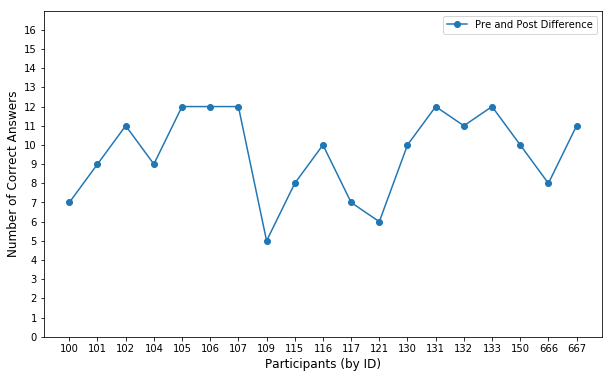

In [20]:
line_data2 = pd.DataFrame()
line_data2 ['Pre and Post Difference']= abs(participants_data['PreTest'] - participants_data['PostTests'])
line_data2.plot.line(figsize=(10, 6), marker='o')
plt.ylabel('Number of Correct Answers', fontsize=12)
plt.xticks(np.arange(0, 19), participants_data['ParticipantID'])
plt.xlabel('Participants (by ID)', fontsize=12)
plt.ylim(0, 17)
plt.yticks(np.arange(0, 17))

In [6]:
line_data2.mean(), line_data2.median()

(Pre and Post Difference    9.578947
 dtype: float64, Pre and Post Difference    10.0
 dtype: float64)

In [21]:
overall_stats = (
    participants_data[['PreTest', 'Checkpoints', 'PostTests']].describe())
overall_stats

,PreTest,Checkpoints,PostTests
count,19.000000,19.000000,19.000000
mean,4.421053,13.000000,14.000000
std,1.502435,2.867442,2.054805
min,1.000000,7.000000,9.000000
25%,3.500000,11.000000,13.000000
50%,5.000000,14.000000,15.000000
75%,6.000000,15.000000,15.000000
max,6.000000,16.000000,16.000000


Text(0, 0.5, 'Number of correct questions')

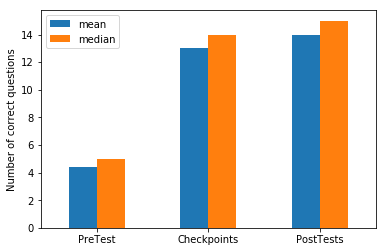

In [22]:
mid_stats = pd.DataFrame()
mid_stats['mean'] = participants_data[['PreTest', 'Checkpoints', 'PostTests']].mean()
mid_stats['median'] =participants_data[['PreTest', 'Checkpoints', 'PostTests']].median() 
mid_stats.plot.bar(rot=0)
plt.ylabel('Number of correct questions')

Text(0.5, 0, 'Post-test score values')

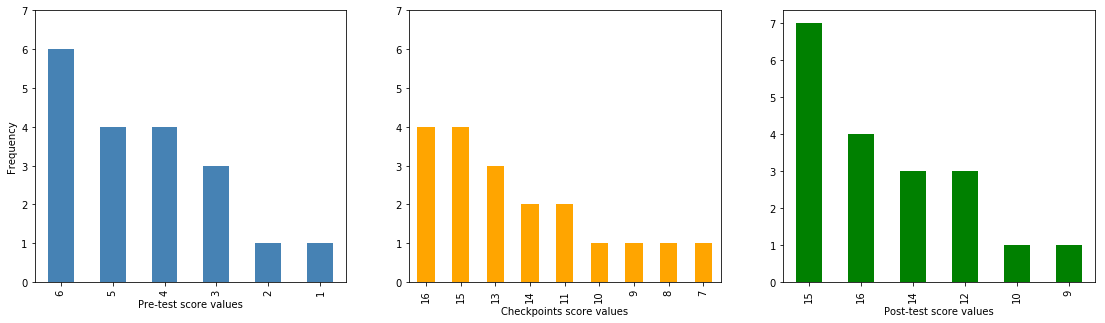

In [23]:
figure = plt.figure(figsize=(19, 5))
plt.subplot(1, 3, 1)
participants_data['PreTest'].value_counts().plot.bar(color=['steelblue'])
plt.ylabel('Frequency')
plt.ylim(0, 7)
plt.xlabel('Pre-test score values')
plt.subplot(1, 3, 2)
participants_data['Checkpoints'].value_counts().plot.bar(color=['orange'])
plt.ylim(0, 7)
plt.xlabel('Checkpoints score values')
plt.subplot(1, 3, 3)
participants_data['PostTests'].value_counts().plot.bar(color=['green'])
plt.xlabel('Post-test score values')

In [24]:
participants_data[['PreTest', 'Checkpoints', 'PostTests']]

,PreTest,Checkpoints,PostTests
0,2,7,9
1,6,13,15
2,1,13,12
3,6,11,15
4,4,15,16
5,4,16,16
6,4,16,16
7,5,9,10
8,6,11,14
9,5,14,15


In [25]:
differences = list(abs(participants_data.PreTest - participants_data.PostTests))
sorted(differences), sum(differences)/len(differences)

([5, 6, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12],
 9.578947368421053)

### Analysis of Types of Questions Data

In [26]:
questions_data = pd.read_excel('thesis_data.xlsx', 
                                       sheet_name='questions')
questions_data 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
pre,5,3,4,4,4,5,4,6,12,5,4,7,5,4,3,10
ckpt,14,17,15,16,14,17,10,18,16,19,17,18,17,16,7,17
post,17,17,17,16,16,17,17,19,18,18,19,17,17,18,7,16
tag,auth,intro,intro,auth,auth,intro,vuln,vuln,concepts,concepts,concepts,intro,vuln,vuln,auth,concepts


In [27]:
q = questions_data.loc[['pre', 'ckpt', 'post']].astype('int64')
q.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
count,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,12.000000,12.333333,12.0,12.000000,11.333333,13.000000,10.333333,14.333333,15.333333,14.00000,13.333333,14.000000,13.000000,12.666667,5.666667,14.333333
std,6.244998,8.082904,7.0,6.928203,6.429101,6.928203,6.506407,7.234178,3.055050,7.81025,8.144528,6.082763,6.928203,7.571878,2.309401,3.785939
min,5.000000,3.000000,4.0,4.000000,4.000000,5.000000,4.000000,6.000000,12.000000,5.00000,4.000000,7.000000,5.000000,4.000000,3.000000,10.000000
25%,9.500000,10.000000,9.5,10.000000,9.000000,11.000000,7.000000,12.000000,14.000000,11.50000,10.500000,12.000000,11.000000,10.000000,5.000000,13.000000
50%,14.000000,17.000000,15.0,16.000000,14.000000,17.000000,10.000000,18.000000,16.000000,18.00000,17.000000,17.000000,17.000000,16.000000,7.000000,16.000000
75%,15.500000,17.000000,16.0,16.000000,15.000000,17.000000,13.500000,18.500000,17.000000,18.50000,18.000000,17.500000,17.000000,17.000000,7.000000,16.500000
max,17.000000,17.000000,17.0,16.000000,16.000000,17.000000,17.000000,19.000000,18.000000,19.00000,19.000000,18.000000,17.000000,18.000000,7.000000,17.000000


In [28]:
q = q.T
q['Pre and Post Difference'] = q['post']- q['pre']
q, q['Pre and Post Difference'].mean(), q['Pre and Post Difference'].median()

(     pre  ckpt  post  Pre and Post Difference
 Q1     5    14    17                       12
 Q2     3    17    17                       14
 Q3     4    15    17                       13
 Q4     4    16    16                       12
 Q5     4    14    16                       12
 Q6     5    17    17                       12
 Q7     4    10    17                       13
 Q8     6    18    19                       13
 Q9    12    16    18                        6
 Q10    5    19    18                       13
 Q11    4    17    19                       15
 Q12    7    18    17                       10
 Q13    5    17    17                       12
 Q14    4    16    18                       14
 Q15    3     7     7                        4
 Q16   10    17    16                        6, 11.3125, 12.0)

([<matplotlib.axis.YTick at 0x12341d10>,
 <a list of 11 Text yticklabel objects>)

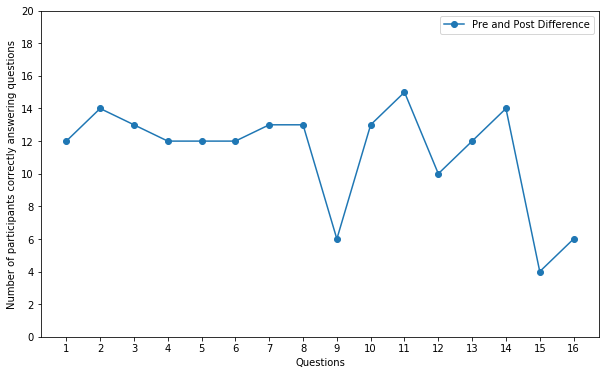

In [34]:
q[['Pre and Post Difference']].plot.line(figsize= (10, 6), marker='o')
plt.xticks(np.arange(0,16), labels=range(1, 17))
plt.xlabel('Questions')
plt.ylabel('Number of participants correctly answering questions')
plt.yticks(np.arange(0,21, 2))

([<matplotlib.axis.YTick at 0x12d460b0>,
 <a list of 20 Text yticklabel objects>)

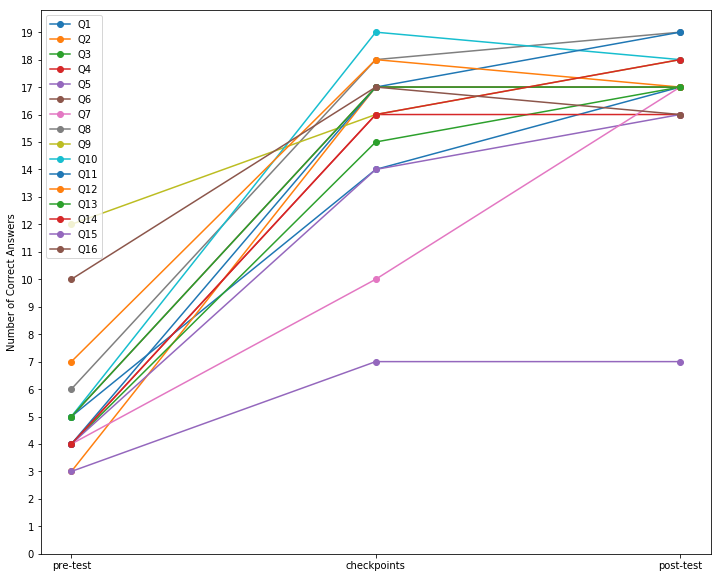

In [30]:
questions_data.loc[['pre', 'ckpt', 'post']].plot.line(figsize=(12, 10), marker='o')
plt.xticks(np.arange(0,3), labels=['pre-test', 'checkpoints', 'post-test'])
plt.ylabel('Number of Correct Answers')
plt.yticks(np.arange(0,20))

In [31]:
inversed_questions_data = pd.DataFrame(index=np.arange(0,16))
inversed_questions_data['pre'] = questions_data.loc['pre'].values
inversed_questions_data['ckpt'] = questions_data.loc['ckpt'].values
inversed_questions_data['post'] = questions_data.loc['post'].values
inversed_questions_data['tag'] = questions_data.loc['tag'].values
inversed_questions_data

,pre,ckpt,post,tag
0,5,14,17,auth
1,3,17,17,intro
2,4,15,17,intro
3,4,16,16,auth
4,4,14,16,auth
5,5,17,17,intro
6,4,10,17,vuln
7,6,18,19,vuln
8,12,16,18,concepts
9,5,19,18,concepts


In [32]:
inversed_questions_data.groupby(['tag'])[['pre', 'ckpt', 'post']].sum()

,pre,ckpt,post
tag,,,
auth,16,51,56
concepts,31,69,71
intro,19,67,68
vuln,19,61,71


Text(0, 0.5, 'Number of correctly answered questions')

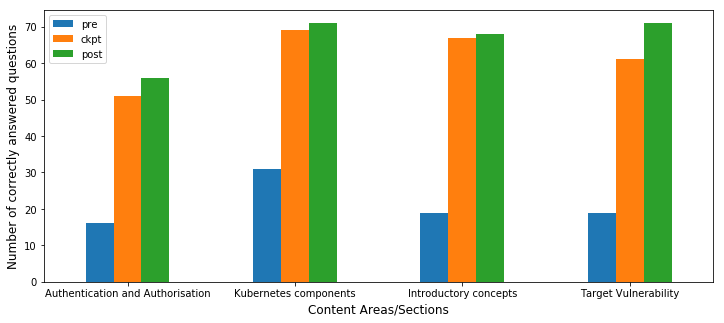

In [33]:
inversed_questions_data.groupby(['tag'])[['pre', 'ckpt', 'post']].sum().plot.bar(figsize=(12, 5))
plt.xticks(np.arange(4),
    labels=['Authentication and Authorisation','Kubernetes components', 'Introductory concepts','Target Vulnerability'], 
           rotation=0)
plt.xlabel('Content Areas/Sections', fontsize=12)
plt.ylabel('Number of correctly answered questions',  fontsize=12)

### Analysis of Engagement Duration Data

In [22]:
duration_data = pd.read_excel('thesis_data.xlsx', 
                                       sheet_name='duration')
duration_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
testerID,100.0,101.0,102.0,104.00,105.00,106.00,107.00,109.0,115.0,116.00,117.00,121.00,130.00,131.00,132.00,133.00,150.00,666.00,667.00
duration,18.3,169.0,86.6,37.63,41.26,40.77,35.99,37.5,27.4,58.96,106.56,18.49,26.21,38.77,36.98,34.78,49.86,41.88,54.68


In [23]:
duration_data['duration'].describe()

count     19.000000
mean      50.611579
std       35.846531
min       18.300000
25%       35.385000
50%       38.770000
75%       52.270000
max      169.000000
Name: duration, dtype: float64

In [24]:
corr_data = duration_data[['duration']].join(participants_data['PostTests'])
corr_data

,duration,PostTests
0,18.30,9
1,169.00,15
2,86.60,12
3,37.63,15
4,41.26,16
5,40.77,16
6,35.99,16
7,37.50,10
8,27.40,14
9,58.96,15


In [25]:
corr_data.corr()## pearson correlation

,duration,PostTests
duration,1.00000,0.03744
PostTests,0.03744,1.00000


Text(0, 0.5, 'Post-tests scores')

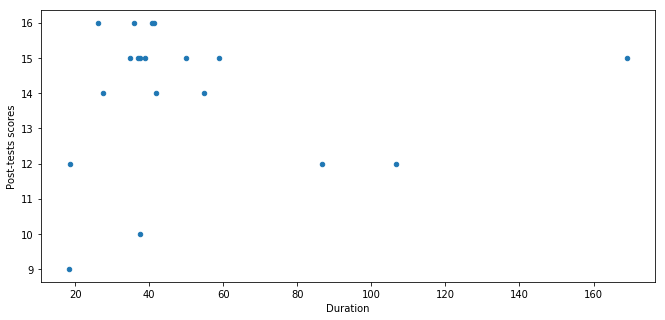

In [26]:
corr_data.plot.scatter(x='duration', y='PostTests', figsize=(11,5))
plt.xlabel('Duration')
plt.ylabel('Post-tests scores')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133C1FB0>]],
      dtype=object)

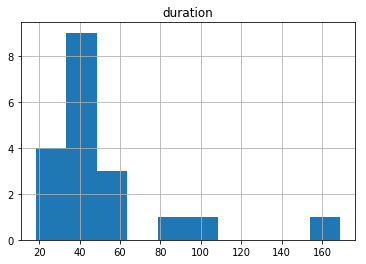

In [27]:
duration_data[['duration']].hist()